## This notebook will explore and analyze the heart failure dataset and use machine learning models to predict heart failure.

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
sns.set(rc={'figure.figsize':(8,6)})
sns.set_palette("pastel")

First let's take a look at the dataset to get an idea of what the data look like, the features of the dataset, the variable types (numerical/categorical), missing values, and some summary statistics.

In [3]:
df = pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
# check for missing values in the dataset

df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


First let's plot the distributions of the different variables, seperated out by numeric and categorical variables.

<AxesSubplot:title={'center':'Serum Creatinine Distribution'}, xlabel='serum_creatinine', ylabel='Count'>

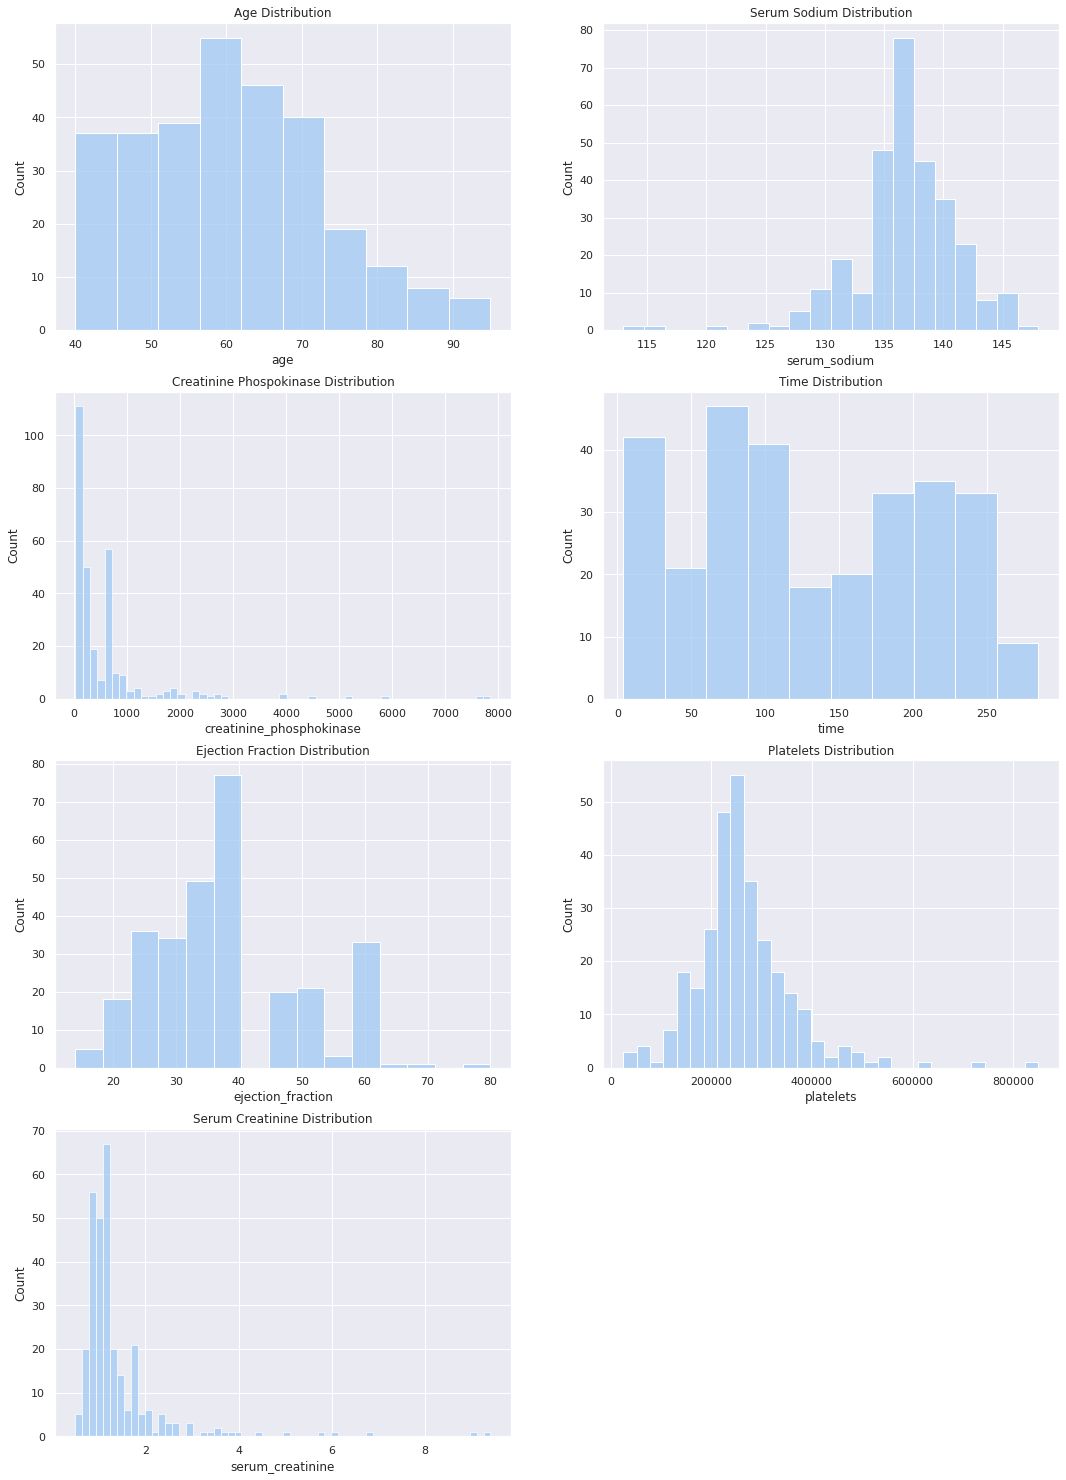

In [8]:
# examine the distribution of the numeric variables

fig = plt.figure(figsize = (18, 26)).tight_layout(h_pad=5.0, w_pad = 5.0)

plt.subplot(421)
plt.title('Age Distribution')
sns.histplot(df.age)

plt.subplot(422)
plt.title('Serum Sodium Distribution')
sns.histplot(df.serum_sodium)

plt.subplot(423)
plt.title('Creatinine Phospokinase Distribution')
sns.histplot(df.creatinine_phosphokinase)

plt.subplot(424)
plt.title('Time Distribution')
sns.histplot(df.time)

plt.subplot(425)
plt.title('Ejection Fraction Distribution')
sns.histplot(df.ejection_fraction)

plt.subplot(426)
plt.title('Platelets Distribution')
sns.histplot(df.platelets)

plt.subplot(427)
plt.title('Serum Creatinine Distribution')
sns.histplot(df.serum_creatinine)

I notice the serum_creatinine and creatinine_phosphokinase features are heavily right-skewed, with serum_sodium left-skewed. Time does not follow a normal distribution. This will be important to keep in mind as we move forward. Now let's visualize the value counts of the categorical variables.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

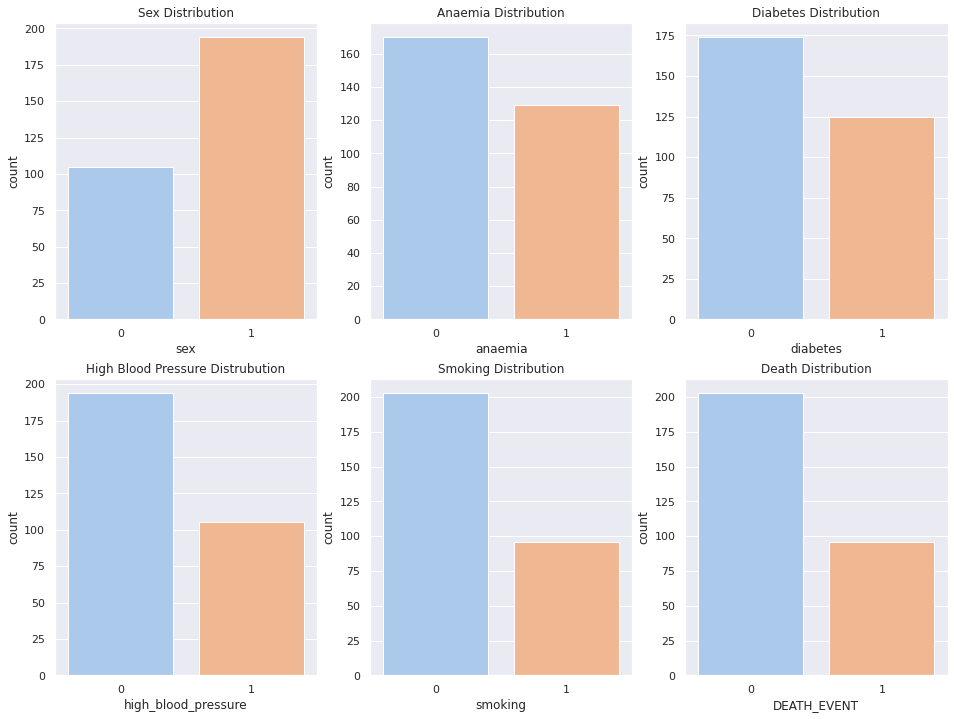

In [9]:
# examine the distribution of the categorical variables

fig = plt.figure(figsize = (16, 12)).tight_layout(pad=3.0)

plt.subplot(231)
plt.title('Sex Distribution')
sns.countplot(df.sex)

plt.subplot(232)
plt.title('Anaemia Distribution')
sns.countplot(df.anaemia)

plt.subplot(233)
plt.title('Diabetes Distribution')
sns.countplot(df.diabetes)

plt.subplot(234)
plt.title('High Blood Pressure Distrubution')
sns.countplot(df.high_blood_pressure)

plt.subplot(235)
plt.title('Smoking Distribution')
sns.countplot(df.smoking)

plt.subplot(236)
plt.title('Death Distribution')
sns.countplot(df.DEATH_EVENT)

plt.show()

I notice the number of survivors is roughly double the number of deaths in the sample.  The same is true for non-smokers vs smokers, and normal blood pressure vs high blood pressure.

I will now seperate the features into numerical and categorical variables, and will standardize the numerical variables.

In [10]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [11]:
df_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']]
df_num = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]

In [12]:
df_cat.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0,0,1,1,0,1
1,0,0,0,1,0,1
2,0,0,0,1,1,1
3,1,0,0,1,0,1
4,1,1,0,0,0,1


In [13]:
# converting age and platelets to integers for simplicity

df_num['age'] = [int(x) for x in df_num.age]
df_num['platelets'] = [int (x) for x in df_num.platelets]
df_num.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75,582,20,265000,1.9,130,4
1,55,7861,38,263358,1.1,136,6
2,65,146,20,162000,1.3,129,7
3,50,111,20,210000,1.9,137,7
4,65,160,20,327000,2.7,116,8


In [14]:
# scaling the numerical data via standardscaler

sc = StandardScaler()
df_cols = df_num.columns
df_num_scaled = sc.fit_transform(df_num)
df_num_scaled = pd.DataFrame(df_num_scaled, columns = df_cols)
df_num_scaled.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,1.193302,0.000166,-1.530560,1.681651e-02,0.490057,-1.504036,-1.629502
1,-0.490896,7.514640,-0.007077,-2.740240e-07,-0.284552,-0.141976,-1.603691
2,0.351203,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785
3,-0.911945,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785
4,0.351203,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879


In [15]:
# master dataframe (unscaled)
df_master = pd.concat([df_num, df_cat], axis=1)
df_master.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,75,582,20,265000,1.9,130,4,0,0,1,1,0,1
1,55,7861,38,263358,1.1,136,6,0,0,0,1,0,1
2,65,146,20,162000,1.3,129,7,0,0,0,1,1,1
3,50,111,20,210000,1.9,137,7,1,0,0,1,0,1
4,65,160,20,327000,2.7,116,8,1,1,0,0,0,1


In [16]:
# master dataframe (scaled)
df_master_scaled = pd.concat([df_num_scaled, df_cat], axis=1)
df_master_scaled.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,1.193302,0.000166,-1.530560,1.681651e-02,0.490057,-1.504036,-1.629502,0,0,1,1,0,1
1,-0.490896,7.514640,-0.007077,-2.740240e-07,-0.284552,-0.141976,-1.603691,0,0,0,1,0,1
2,0.351203,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,0,0,0,1,1,1
3,-0.911945,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,1,0,0,1,0,1
4,0.351203,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,1,1,0,0,0,1


Let's take a look at any correlations that exist between the features.

<AxesSubplot:>

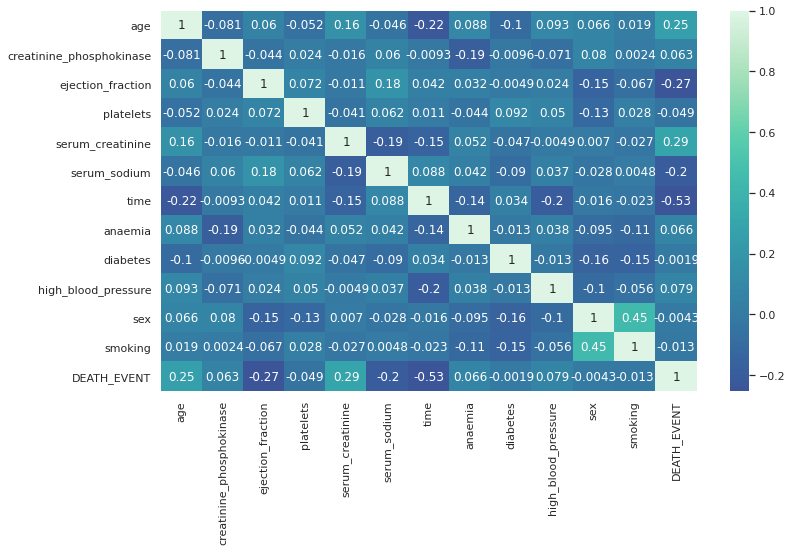

In [17]:
# heatmap to identify correlations between features

fig = plt.figure(figsize = (12, 7))
sns.heatmap(df_master_scaled.corr(), center=0, cmap='mako', robust=True, annot=True)

I note fairly significant correlations between death (our dependent variable), and the independent variables age, ejection fraction, serum_creatinine, serum_sodium, and time (which has the largest correlation).  Let's take a look.

Median Age for Death:  65.0 
Median age for Survivor:  60.0 
Difference:  5.0


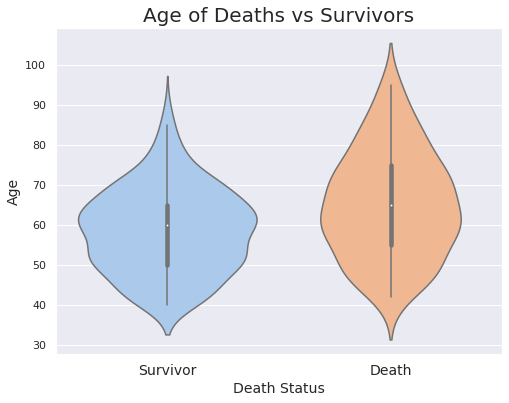

In [18]:
median_death = df_master[df_master['DEATH_EVENT']==1]['age'].median()
median_life = df_master[df_master['DEATH_EVENT']==0]['age'].median()
print("Median Age for Death: ", median_death, '\nMedian age for Survivor: ', median_life, '\nDifference: ', median_death-median_life)

ax = sns.violinplot(data=df_master, x='DEATH_EVENT', y='age')
ax.set_title('Age of Deaths vs Survivors', fontsize=20)
ax.set_xlabel('Death Status', fontsize=14)
ax.set_ylabel('Age', fontsize=14)
ax.set_xticklabels(['Survivor', 'Death'], fontsize=14)
plt.show()

The median age of deaths is roughly 5 years older than survivors (65 vs 60 yrs)

Proportion of Female Deaths:  0.3238095238095238 
Proportion of Male Deaths:  0.31958762886597936 
Difference:  0.004221894943544469


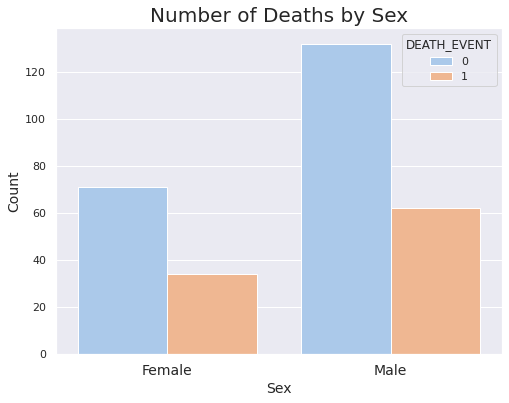

In [19]:
female_deaths = len(df_master[(df_master['DEATH_EVENT']==1) & (df_master['sex']==0)])/len(df_master[df_master['sex']==0])
male_deaths = len(df_master[(df_master['DEATH_EVENT']==1) & (df_master['sex']==1)])/len(df_master[df_master['sex']==1])
print("Proportion of Female Deaths: ", female_deaths, '\nProportion of Male Deaths: ', male_deaths, '\nDifference: ', female_deaths-male_deaths)

ax = sns.countplot(data=df_master, x='sex', hue='DEATH_EVENT')
ax.set_title('Number of Deaths by Sex', fontsize=20)
ax.set_xlabel('Sex', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_xticklabels(['Female', 'Male'], fontsize=14)
plt.show()

Roughly the same proportion of males and females die of heart failure.

Median Ejection Fraction for Death:  30.0 
Median ejection Fraction for Survivors:  38.0 
Difference:  -8.0


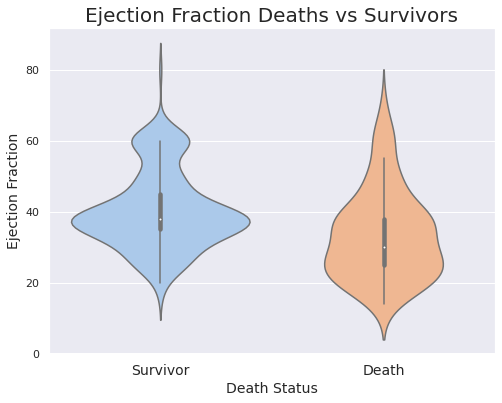

In [20]:
median_death = df_master[df_master['DEATH_EVENT']==1]['ejection_fraction'].median()
median_life = df_master[df_master['DEATH_EVENT']==0]['ejection_fraction'].median()
print("Median Ejection Fraction for Death: ", median_death, '\nMedian ejection Fraction for Survivors: ', median_life, '\nDifference: ', median_death-median_life)

ax = sns.violinplot(data=df_master, x='DEATH_EVENT', y='ejection_fraction')
ax.set_title('Ejection Fraction Deaths vs Survivors', fontsize=20)
ax.set_xticklabels(['Survivor', 'Death'], fontsize=14)
ax.set_xlabel('Death Status', fontsize=14)
ax.set_ylabel('Ejection Fraction', fontsize=14)
plt.show()

It seems lower ejection fraction seems to be associated with greater chance of heart failure according to our sample data.

Median Death:  1.3 
Median Life:  1.0 
Difference:  0.30000000000000004


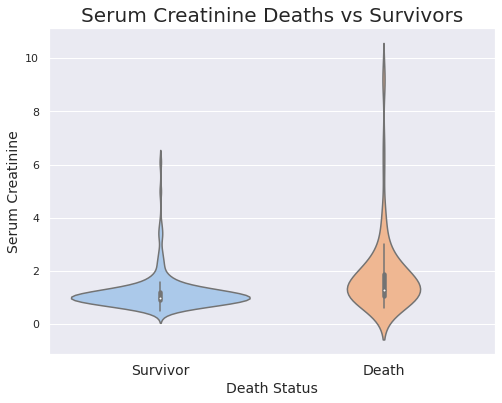

In [21]:
median_death = df_master[df_master['DEATH_EVENT']==1]['serum_creatinine'].median()
median_life = df_master[df_master['DEATH_EVENT']==0]['serum_creatinine'].median()
print("Median Death: ", median_death, '\nMedian Life: ', median_life, '\nDifference: ', median_death-median_life)

ax = sns.violinplot(data=df_master, x='DEATH_EVENT', y='serum_creatinine')
ax.set_title('Serum Creatinine Deaths vs Survivors', fontsize=20)
ax.set_xticklabels(['Survivor', 'Death'], fontsize=14)
ax.set_ylabel('Serum Creatinine', fontsize=14)
ax.set_xlabel('Death Status', fontsize=14)
plt.show()

Serum creatinine levels seem to be very similar, though the deaths have many more outliers on the high end.

Median Death:  44.5 
Median Life:  172.0 
Difference:  -127.5


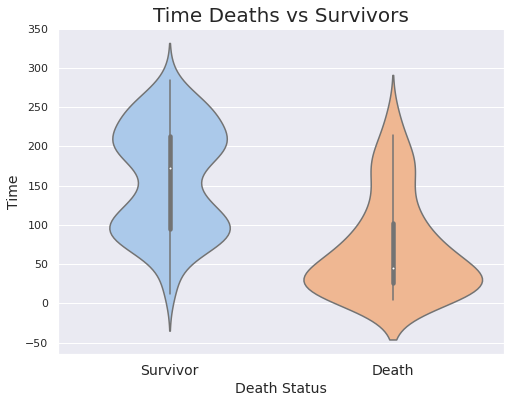

In [22]:
median_death = df_master[df_master['DEATH_EVENT']==1]['time'].median()
median_life = df_master[df_master['DEATH_EVENT']==0]['time'].median()
print("Median Death: ", median_death, '\nMedian Life: ', median_life, '\nDifference: ', median_death-median_life)

ax = sns.violinplot(data=df_master, x='DEATH_EVENT', y='time')
ax.set_title('Time Deaths vs Survivors', fontsize=20)
ax.set_xticklabels(['Survivor', 'Death'], fontsize=14)
ax.set_ylabel('Time', fontsize=14)
ax.set_xlabel('Death Status', fontsize=14)
plt.show()

We can clearly see the time variable is widely dispersed and does not follow a normal distribution especially for survivors. Now let's perform some multivariate analysis to see if there is anything interesting there.

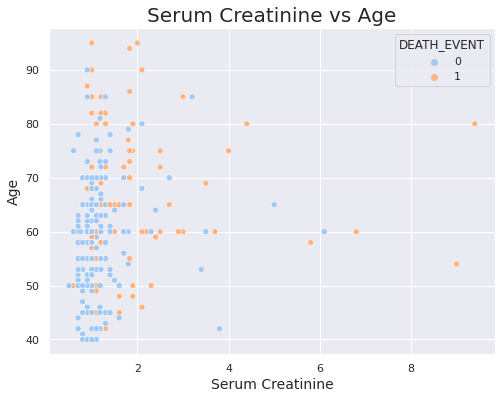

In [23]:
ax = sns.scatterplot(x=df_master['serum_creatinine'], y=df_master['age'], hue=df_master['DEATH_EVENT'])
ax.set_title('Serum Creatinine vs Age', fontsize=20)
#ax.set_xticklabels(['Survivor', 'Death'], fontsize=14)
ax.set_ylabel('Age', fontsize=14)
ax.set_xlabel('Serum Creatinine', fontsize=14)
plt.show()

Across all age levels we see a greater concentration of survivors having lower serum creatinine levels, with many deaths seeming to be associated with slightly greater levels of serum creatinine.

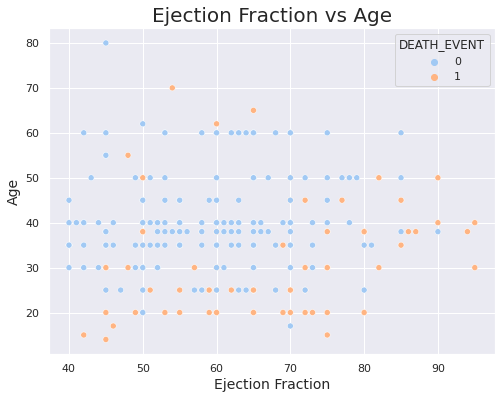

In [24]:
ax = sns.scatterplot(data=df_master, x='age', y='ejection_fraction', hue='DEATH_EVENT')
ax.set_title('Ejection Fraction vs Age', fontsize=20)
ax.set_ylabel('Age', fontsize=14)
ax.set_xlabel('Ejection Fraction', fontsize=14)
plt.show()

No clear trends here, though it seems there is a greater concentration of deaths at lower ejection fraction levels at all ages.

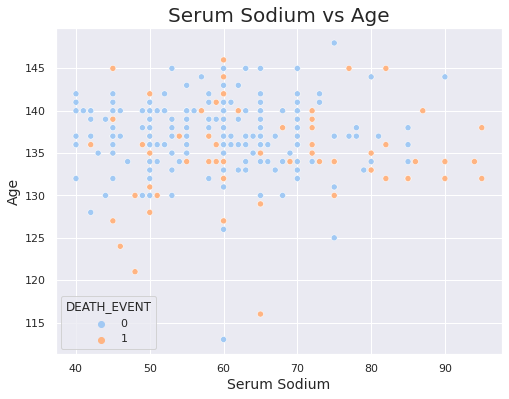

In [25]:
ax = sns.scatterplot(data=df_master, x='age', y='serum_sodium', hue='DEATH_EVENT')
ax.set_title('Serum Sodium vs Age', fontsize=20)
ax.set_ylabel('Age', fontsize=14)
ax.set_xlabel('Serum Sodium', fontsize=14)
plt.show()

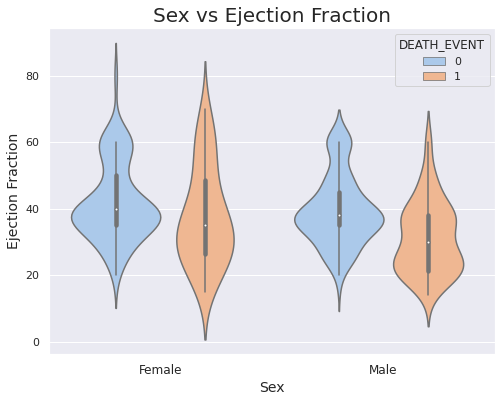

In [26]:
ax = sns.violinplot(data=df_master, x='sex', y='ejection_fraction', hue='DEATH_EVENT')
ax.set_title('Sex vs Ejection Fraction', fontsize=20)
ax.set_xticklabels(['Female', 'Male'], fontsize=12)
ax.set_ylabel('Ejection Fraction', fontsize=14)
ax.set_xlabel('Sex', fontsize=14)
plt.show()

It appears females overall have a slightly higher ejection fraction on average than males, slightly more notable in the deaths.  The female deaths have a more dispersed ejection fraction than male deaths. Lower ejection fraction appears slightly correlated to higher chance of heart failure, and this seems true for both males and females. Males seem to have lower overall ejection fraction than females in the sample.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


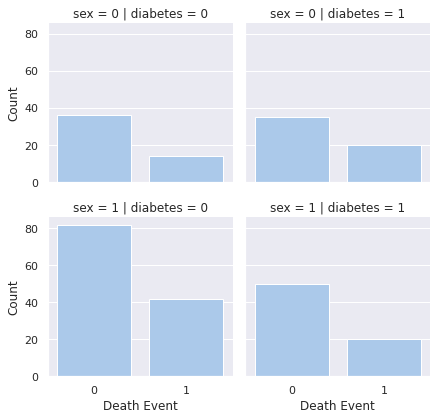

In [27]:
g = sns.FacetGrid(df, row='sex', col='diabetes')
g.map(sns.countplot, 'DEATH_EVENT')
g.set_axis_labels("Death Event", "Count")

The ratio of deaths/survivors for males without diabetes is roughly 2x, compared to ~2.5x for males with diabetes.  For females, the ratio of deaths/survivors is higher in people without diabetes vs with diabetes.

# Data Preprocessing / Modeling

I will first drop the variables that seem to be the least correlated to the dependent variable.

In [28]:
X = df_master_scaled.drop(['DEATH_EVENT', 'sex', 'anaemia', 'diabetes', 'high_blood_pressure', 'platelets', 'smoking'], axis=1)
y = df[['DEATH_EVENT']]

In [29]:
X.head()

,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium,time
0,1.193302,0.000166,-1.530560,0.490057,-1.504036,-1.629502
1,-0.490896,7.514640,-0.007077,-0.284552,-0.141976,-1.603691
2,0.351203,-0.449939,-1.530560,-0.090900,-1.731046,-1.590785
3,-0.911945,-0.486071,-1.530560,0.490057,0.085034,-1.590785
4,0.351203,-0.435486,-1.530560,1.264666,-4.682176,-1.577879


In [30]:
y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


Split the data into training and testing sets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

In [32]:
X_train

,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium,time
161,-1.332995,-0.466456,-0.260991,-0.575031,0.539054,-0.119519
260,-0.490896,-0.532527,0.162199,-0.381379,0.312044,1.325935
218,0.603833,0.453367,-0.260991,-0.284552,-0.595996,0.861324
123,-0.069846,0.000166,-0.684180,-0.478205,1.901114,-0.455071
39,-0.069846,-0.358060,-0.007077,1.555145,1.220084,-1.293951
...,...,...,...,...,...,...
203,-0.069846,-0.539753,-1.107370,2.039276,-0.141976,0.732266
255,-0.743526,-0.403483,-0.684180,-0.381379,1.220084,1.106535
72,2.035401,5.471619,-0.260991,-0.381379,-1.050016,-0.751905
235,1.361722,-0.488136,1.008578,-0.284552,0.085034,1.016195


In [33]:
y_train

,DEATH_EVENT
161,0
260,0
218,0
123,0
39,1
...,...
203,0
255,0
72,1
235,0


In [34]:
# Import the models to be used

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost

# Import the evaluation methodologies to be used
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
# create a dictionary containing the various models (method borrowed from another Kaggle user - currently searching for original author to provide credit)

model_list = dict()
model_list['Decision Tree'] = DecisionTreeClassifier(class_weight={0:1,1:2})
model_list['Random Forest'] = RandomForestClassifier(class_weight={0:1,1:2})
model_list['Logreg'] = LogisticRegression()
model_list['GradientBoost'] = GradientBoostingClassifier()
model_list['AdaBoost'] = AdaBoostClassifier()
model_list['XGBoost'] = xgboost.XGBClassifier()

In [36]:
# iterate through the models in the dictionary and fit the training data to each model
for model in model_list:
    model_list[model].fit(X_train, y_train)
    print(model + ' : fit')

Decision Tree : fit
Random Forest : fit
Logreg : fit


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoost : fit
AdaBoost : fit
[01:41:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost : fit


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [37]:
# iterate through the models in the dictionary and print a classification report to evaluate the models

print("Train set prediction")
for item in model_list:
        
    print(item)
    model = model_list[item]
    y_train_pred = model.predict(X_train)
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

Train set prediction
Decision Tree
[[157   0]
 [  0  82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00        82

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239

Random Forest
[[157   0]
 [  0  82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00        82

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239

Logreg
[[139  18]
 [ 27  55]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       157
           1       0.75      0.67      0.71        82

    accuracy                           0.81       239
   

<AxesSubplot:>

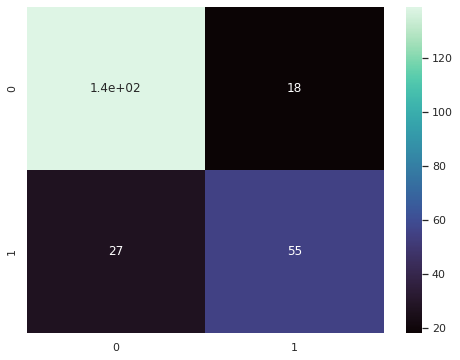

In [38]:
# correlation matrix for the logistical regression

model = model_list['Logreg']
y_train_pred = model.predict(X_train)
arg_train = {'y_true':y_train, 'y_pred':y_train_pred}
sns.heatmap(confusion_matrix(**arg_train), annot=True, cmap='mako')

<AxesSubplot:>

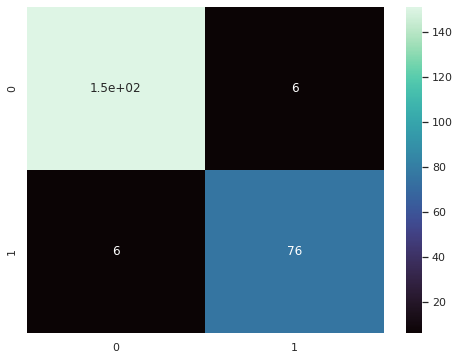

In [39]:
# correlation matrix for the adaboost model

model = model_list['AdaBoost']
y_train_pred = model.predict(X_train)
arg_train = {'y_true':y_train, 'y_pred':y_train_pred}
sns.heatmap(confusion_matrix(**arg_train), annot=True, cmap='mako')

In [40]:
#now the testing set

print("Test set prediction")
for item in model_list:
        
    print(item)
    model = model_list[item]
    y_test_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))

Test set prediction
Decision Tree
[[38  8]
 [ 4 10]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        46
           1       0.56      0.71      0.63        14

    accuracy                           0.80        60
   macro avg       0.73      0.77      0.74        60
weighted avg       0.82      0.80      0.81        60

Random Forest
[[40  6]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        46
           1       0.67      0.86      0.75        14

    accuracy                           0.87        60
   macro avg       0.81      0.86      0.83        60
weighted avg       0.89      0.87      0.87        60

Logreg
[[42  4]
 [ 3 11]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        46
           1       0.73      0.79      0.76        14

    accuracy                           0.88        60
   macro avg    

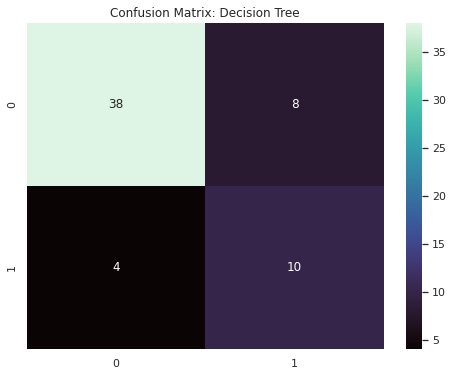

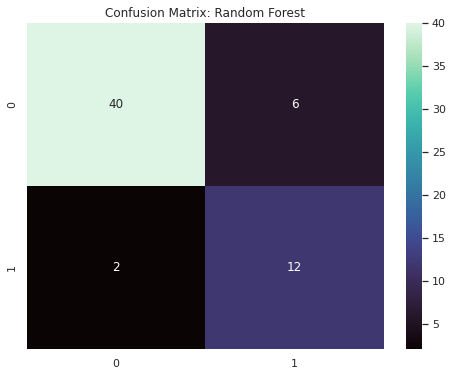

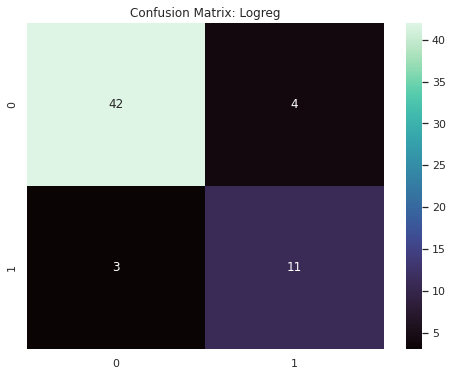

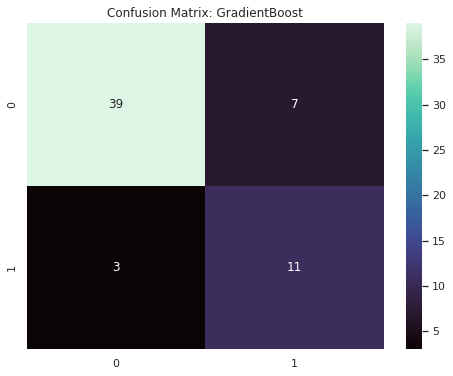

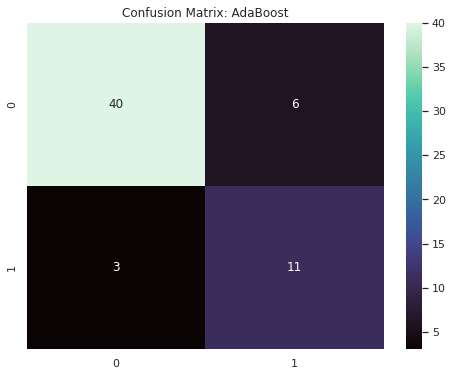

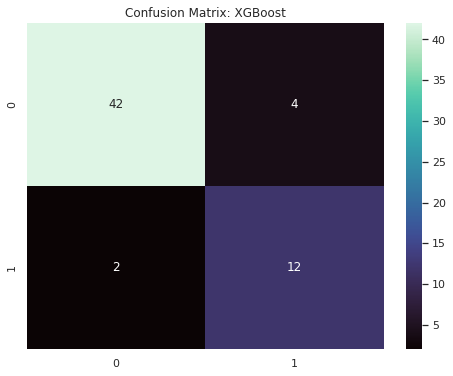

In [41]:
# correlation matrices for each model in model_list

for item in model_list:
        
    #print(item)
    model = model_list[item]
    y_test_pred = model.predict(X_test)
    ax = sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, cmap='mako')
    ax.set_title('Confusion Matrix: '+ item)
    plt.show()

It seems the XGBoost model has the highest average recall score of the models with the test set, followed closely by the random forest and logistical regression models.  Now let's plot the feature importances for each model.

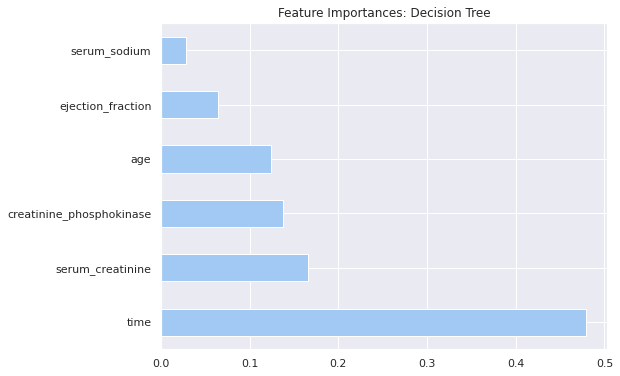

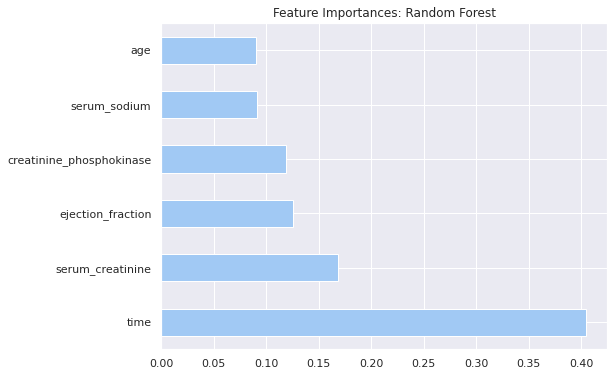

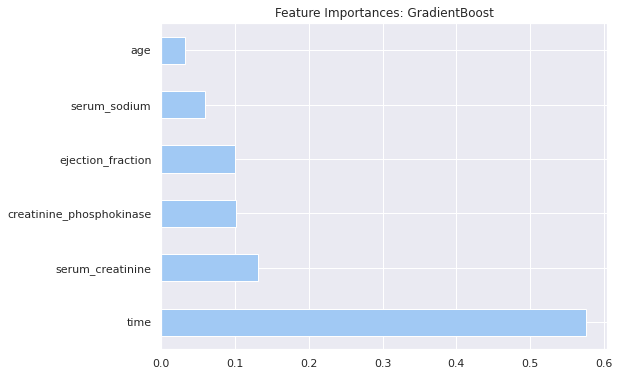

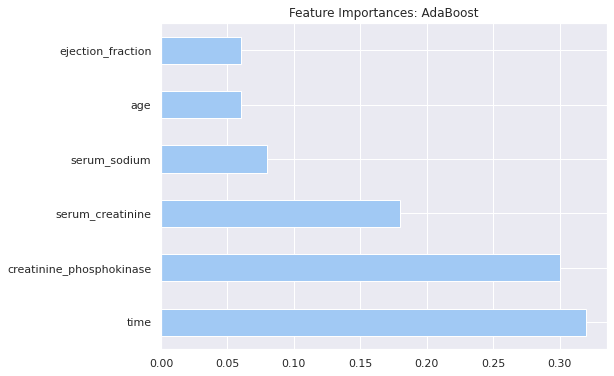

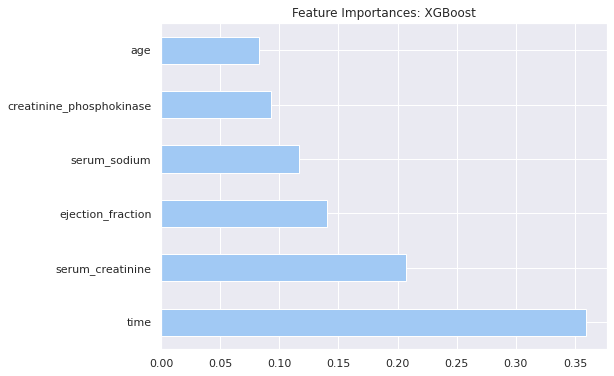

In [42]:
#plot graph of feature importances
for item in model_list:
        
    if item is not "Logreg":
        feat_importances = pd.Series(model_list[item].feature_importances_, index=X.columns)
        ax = feat_importances.nlargest(10).plot(kind='barh')
        ax.set_title('Feature Importances: '+ item)
        plt.show()



Time appears to be the most relevant feature in each of the models, significantly outweighing the other features in some of the models.  Creatinine phosphokinase and serum creatinine are much more important in the Adaboost model.

I hope you enjoyed my exploratory analysis and basic model development with the heart disease dataset.  There is quite a bit a bit more that can be done to further explore these data and improve the models, which I will likely explore in further revisions to this analysis.  Any feedback/suggestions to help improve my work would be greatly appreciated!